In [15]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Inline plotting for Colab
%matplotlib inline

# Optional: nicer plot style
sns.set(style="whitegrid", context="notebook", font_scale=1.1)

In [16]:
from google.colab import files

# Upload salary.csv from your computer
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv('salary.csv')

# Preview the data
df.head()

Saving salary.csv to salary (1).csv


,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [17]:
# Shape of the dataset
print("Dataset shape:", df.shape)

# Info on columns and data types
df.info()

# Summary statistics
df.describe()

Dataset shape: (30, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


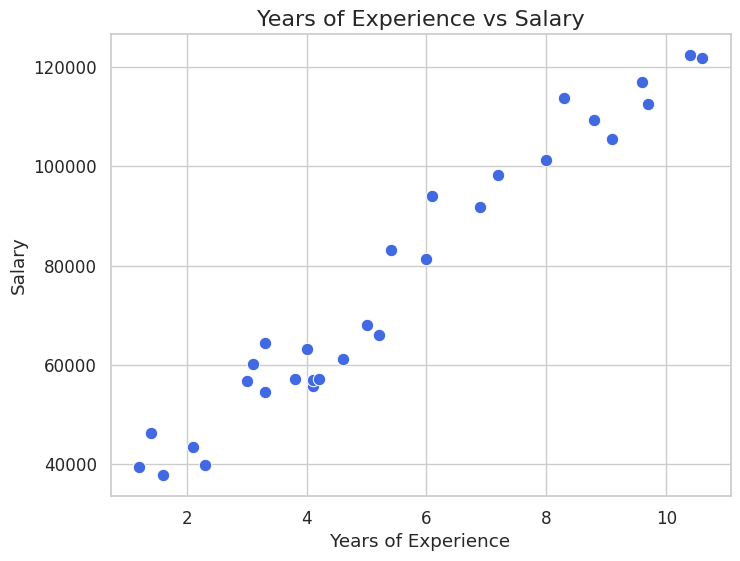

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='YearsExperience',
    y='Salary',
    data=df,
    s=80,
    color='royalblue',
    edgecolor='white'
)
plt.title('Years of Experience vs Salary', fontsize=16)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [19]:
# Features (X) and target (y)
X = df[['YearsExperience']]   # 2D array
y = df['Salary']              # 1D array

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 24
Test set size: 6


In [20]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Model parameters
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

Intercept (b0): 24380.201479473704
Slope (b1): 9423.815323030976


In [21]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

# R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2:.4f}")

    Actual      Predicted
27  112636  115791.210113
15   67939   71499.278095
23  113813  102597.868661
17   83089   75268.804224
8    64446   55478.792045
9    57190   60190.699707
R² score: 0.9024


In [23]:
# Compute the Sum of Squared Errors (SSE)
sse = np.sum((y_test - y_pred) ** 2)
print(f"Sum of Squared Errors (SSE): {sse:.4f}")

Sum of Squared Errors (SSE): 298980581.1355


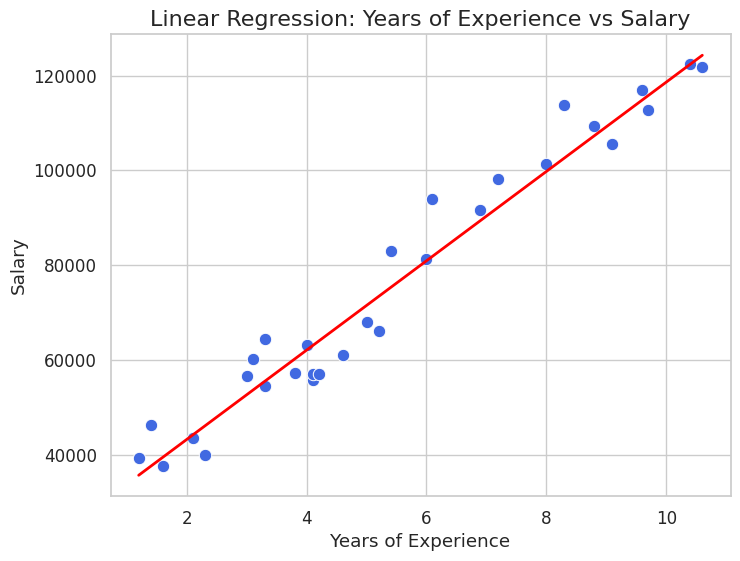

In [22]:
plt.figure(figsize=(8,6))

# Scatter plot of actual data
sns.scatterplot(
    x='YearsExperience',
    y='Salary',
    data=df,
    s=80,
    color='royalblue',
    edgecolor='white'
)

# Regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

plt.title('Linear Regression: Years of Experience vs Salary', fontsize=16)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In the TV advertisement example, the goal was to predict sales based on TV advertising budget using simple linear regression.
In this salary prediction exercise, the goal is to predict salary based on years of experience.

Similarities:
- Both use one independent variable (TV budget or years of experience) and one dependent variable (sales or salary).
- Both follow the same workflow: load data → visualize → split into train/test → fit a linear regression model → evaluate → plot regression line.
- Both interpret the slope as the change in the dependent variable for a one‑unit increase in the independent variable.

Differences:
- The TV ad dataset measures marketing spend and sales revenue, while the salary dataset measures work experience and annual salary.
- The scale and units of the variables differ, but the underlying regression concept is identical.


In this model, the intercept means that a person with 0 years of experience is predicted to earn approximately b0 currency units per year.
The slope means that for each additional year of experience, the predicted salary increases by about b1 currency units.



